# Step 1: Extract Data

In [120]:
import pandas as pd

In [121]:
# Load the dataset
data = pd.read_csv('C:/Users/tanjo/Desktop/Porfolio/Hotel 2/data/raw/hotel_bookings.csv')

In [122]:
data.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


# Step 2: Transform Data

We will perform several transformations including cleaning the data, handling missing values, and creating new columns as needed.

In [123]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

index                                  0
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent           

In [124]:
# Drop the 'company' column
#data.drop(columns=['company'], inplace=True)

# Replace missing values in 'children' with the mean value
data['children'].fillna(data['children'].mean(), inplace=True)

# Drop rows with missing values in 'country' and 'agent'
data.dropna(subset=['country', 'agent'], inplace=True)

In [125]:
# Drop rows with missing values in 'country' and 'agent'
data.drop(columns=['company'], inplace=True)

In [126]:
# Check for remaining missing values
missing_values = data.isnull().sum()
print(data.shape)
missing_values

(102896, 32)


index                             0
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                         

# Step 3: Transform Data

In [127]:
# Combine arrival date columns into a single datetime column
data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + 
                                      data['arrival_date_month'].astype(str) + '-' + 
                                      data['arrival_date_day_of_month'].astype(str),
                                      format='%Y-%B-%d')

In [128]:
# Calculate total stay duration
data['stay_duration'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

In [129]:
# Drop redundant columns after transformation
data.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

In [130]:
# Display the first few rows of the transformed dataframe
data.head()

,index,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration
3,3,Resort Hotel,0,13,27,0,1,1,0.0,0,...,304.0,0,Transient,75.0,0,0,Check-Out,02-07-15,2015-07-01,1
4,4,Resort Hotel,0,14,27,0,2,2,0.0,0,...,240.0,0,Transient,98.0,0,1,Check-Out,03-07-15,2015-07-01,2
5,5,Resort Hotel,0,14,27,0,2,2,0.0,0,...,240.0,0,Transient,98.0,0,1,Check-Out,03-07-15,2015-07-01,2
7,7,Resort Hotel,0,9,27,0,2,2,0.0,0,...,303.0,0,Transient,103.0,0,1,Check-Out,03-07-15,2015-07-01,2
8,8,Resort Hotel,1,85,27,0,3,2,0.0,0,...,240.0,0,Transient,82.0,0,1,Canceled,06-05-15,2015-07-01,3


In [136]:
data.shape

(102896, 31)

# Step 4: Load Data

In [132]:
from sqlalchemy import create_engine

In [137]:
# Create a SQLite database and load the data into it
engine = create_engine('sqlite:///hotel_bookings.db')
data.to_sql('bookings', con=engine, index=False, if_exists='replace')
data.to_csv('transformed_data.csv', index=False)
# Confirm the data has been loaded
loaded_data = pd.read_sql('SELECT * FROM bookings', con=engine)
loaded_data.head()

,index,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration
0,3,Resort Hotel,0,13,27,0,1,1,0.0,0,...,304.0,0,Transient,75.0,0,0,Check-Out,02-07-15,2015-07-01 00:00:00.000000,1
1,4,Resort Hotel,0,14,27,0,2,2,0.0,0,...,240.0,0,Transient,98.0,0,1,Check-Out,03-07-15,2015-07-01 00:00:00.000000,2
2,5,Resort Hotel,0,14,27,0,2,2,0.0,0,...,240.0,0,Transient,98.0,0,1,Check-Out,03-07-15,2015-07-01 00:00:00.000000,2
3,7,Resort Hotel,0,9,27,0,2,2,0.0,0,...,303.0,0,Transient,103.0,0,1,Check-Out,03-07-15,2015-07-01 00:00:00.000000,2
4,8,Resort Hotel,1,85,27,0,3,2,0.0,0,...,240.0,0,Transient,82.0,0,1,Canceled,06-05-15,2015-07-01 00:00:00.000000,3


# Step 5: Analyze and Visualize Data

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
#Let's have an overview of the data

loaded_data.describe()

,index,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,stay_duration
count,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000,102896.000000
mean,61096.622658,0.390326,111.738007,27.339255,0.978182,2.589673,1.899928,0.111231,0.007697,0.014034,0.077214,0.024364,0.201777,86.544074,2.619528,104.678736,0.053034,0.605466,3.567855
std,34232.370667,0.487826,107.681005,13.279881,1.003991,1.905939,0.490886,0.411978,0.097088,0.117630,0.758178,0.435755,0.624948,110.713678,18.797261,50.022122,0.225357,0.799336,2.549889
min,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,32837.250000,0.000000,26.000000,17.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,73.000000,0.000000,0.000000,2.000000
50%,61075.500000,0.000000,79.000000,28.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.000000,0.000000,3.000000
75%,90898.250000,1.000000,169.000000,38.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,127.800000,0.000000,1.000000,4.000000
max,119389.000000,1.000000,629.000000,53.000000,16.000000,41.000000,26.000000,10.000000,10.000000,1.000000,26.000000,50.000000,18.000000,535.000000,391.000000,5400.000000,3.000000,5.000000,57.000000


In [141]:
categorical_summary = data.describe(include=['O'])
categorical_summary

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,102896,102896,102896,102896,102896,102896,102896,102896,102896,102896,102896
unique,2,5,174,7,5,8,10,3,4,3,923
top,City Hotel,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21-10-15
freq,71183,77640,37593,56058,94575,73265,64502,90326,77756,62733,1426


In [142]:
# Average Stay Duration
avg_stay_duration = data['stay_duration'].mean()
print(f'Average Stay Duration: {avg_stay_duration:.2f} nights')

# Bookings by Hotel Type
bookings_by_hotel = data['hotel'].value_counts()
print(bookings_by_hotel)

Average Stay Duration: 3.57 nights
hotel
City Hotel      71183
Resort Hotel    31713
Name: count, dtype: int64


In [143]:
avg_adr_by_hotel = data.groupby('hotel')['adr'].mean()
avg_adr_by_hotel

hotel
City Hotel      106.724204
Resort Hotel    100.087480
Name: adr, dtype: float64

C:\Users\tanjo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


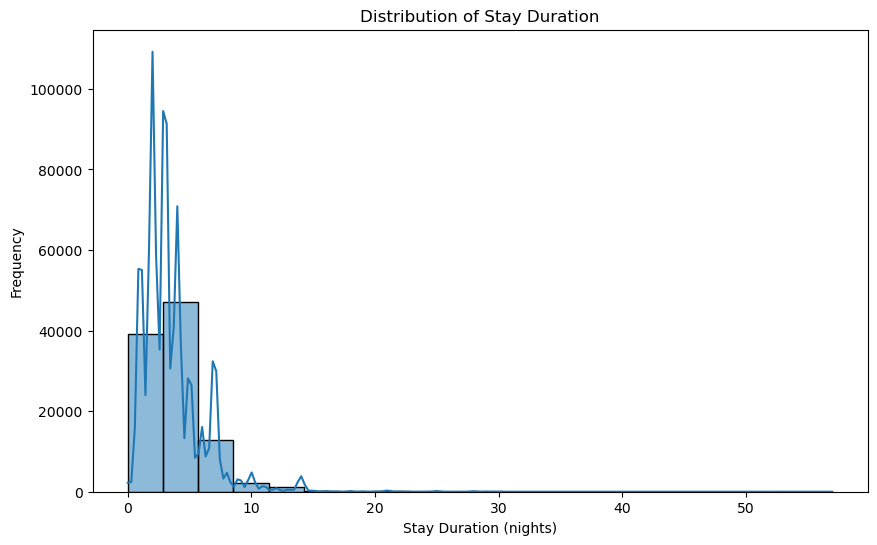

In [144]:
plt.figure(figsize=(10,6))
sns.histplot(data['stay_duration'], bins=20, kde=True)
plt.title('Distribution of Stay Duration')
plt.xlabel('Stay Duration (nights)')
plt.ylabel('Frequency')
plt.show()

## Analyse by month

In [91]:
bookings_by_month = data['arrival_date'].dt.month.value_counts().sort_index()
bookings_by_month.index = bookings_by_month.index.map(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
bookings_by_month

arrival_date
January       11
February       2
March          5
April          1
May           18
June           4
July           5
August        14
September      5
October       18
November     129
December       5
Name: count, dtype: int64

In [92]:
avg_adr_by_month = data.groupby(data['arrival_date'].dt.month)['adr'].mean().sort_index()
avg_adr_by_month.index = avg_adr_by_month.index.map(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
avg_adr_by_month

arrival_date
January       63.270000
February      64.000000
March         46.540000
April         67.500000
May           90.222222
June         109.007500
July         164.030000
August       118.035714
September    159.520000
October       74.425000
November      44.680465
December      57.072000
Name: adr, dtype: float64

## Analysis by Market Segment

In [21]:
bookings_by_market_segment = data['market_segment'].value_counts()
bookings_by_market_segment

market_segment
Online TA        56058
Offline TA/TO    23774
Groups           15661
Direct            6583
Corporate          692
Complementary      103
Aviation            25
Name: count, dtype: int64

In [22]:
avg_adr_by_market_segment = data.groupby('market_segment')['adr'].mean()
avg_adr_by_market_segment

market_segment
Aviation          99.640000
Complementary      2.953301
Corporate         68.731532
Direct           128.167377
Groups            78.439312
Offline TA/TO     87.143460
Online TA        117.320513
Name: adr, dtype: float64

## Visualize Key Insights

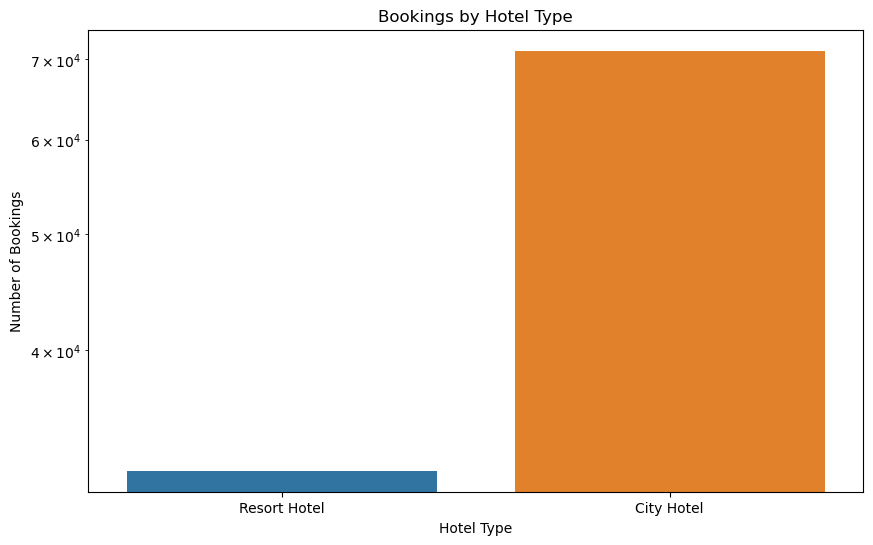

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='hotel')
plt.title('Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.yscale('log')
plt.savefig('Bookings by Hotel Type.png')
plt.savefig('Bookings by Hotel Type.pdf')
plt.show()

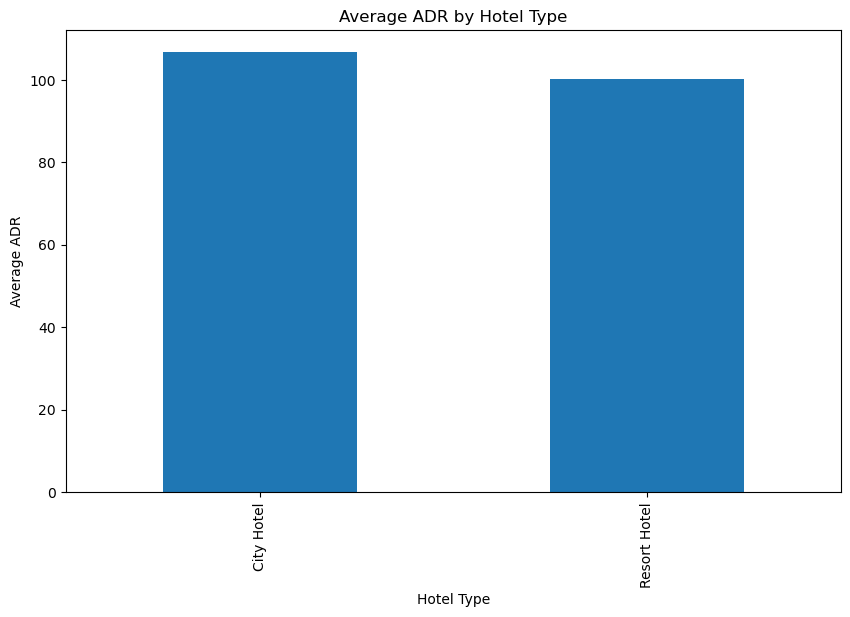

In [60]:
plt.figure(figsize=(10,6))
avg_adr_by_hotel.plot(kind='bar')
plt.title('Average ADR by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average ADR')
plt.savefig('Average ADR by Hotel Type.png')
plt.savefig('Average ADR by Hotel Type.pdf')
plt.show()

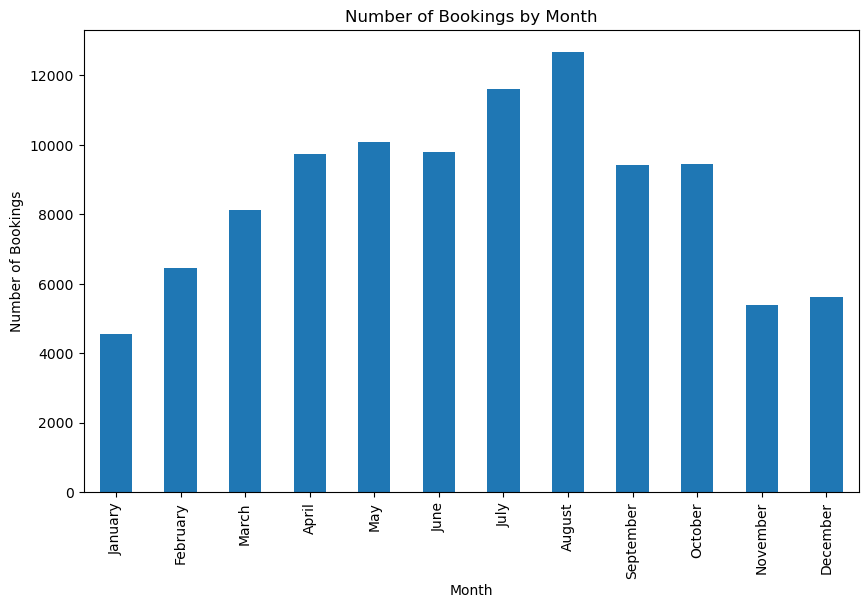

In [61]:
plt.figure(figsize=(10,6))
bookings_by_month.plot(kind='bar')
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.savefig('Number of Bookings by Month.png')
plt.savefig('Number of Bookings by Month.pdf')
plt.show()

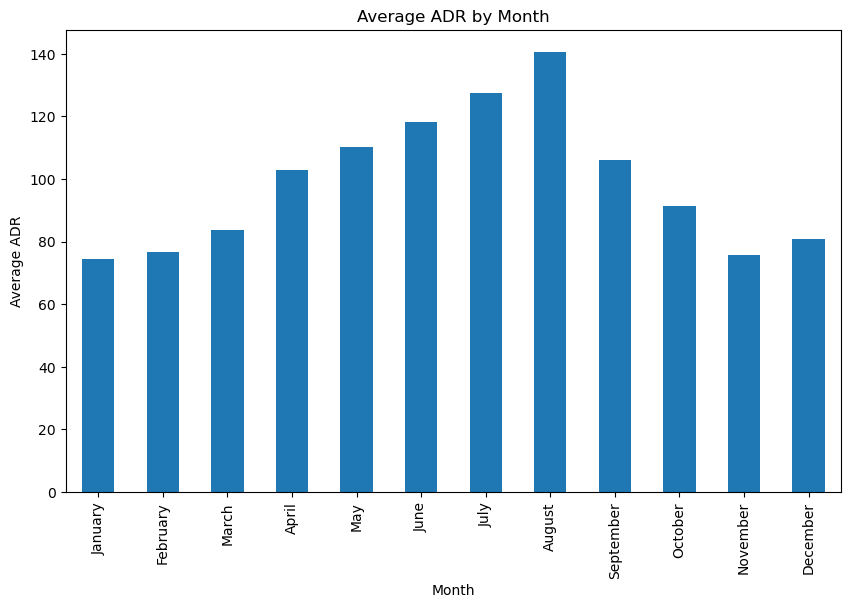

In [62]:
plt.figure(figsize=(10,6))
avg_adr_by_month.plot(kind='bar')
plt.title('Average ADR by Month')
plt.xlabel('Month')
plt.ylabel('Average ADR')
plt.savefig('Average ADR by Month.png')
plt.savefig('Average ADR by Month.pdf')
plt.show()

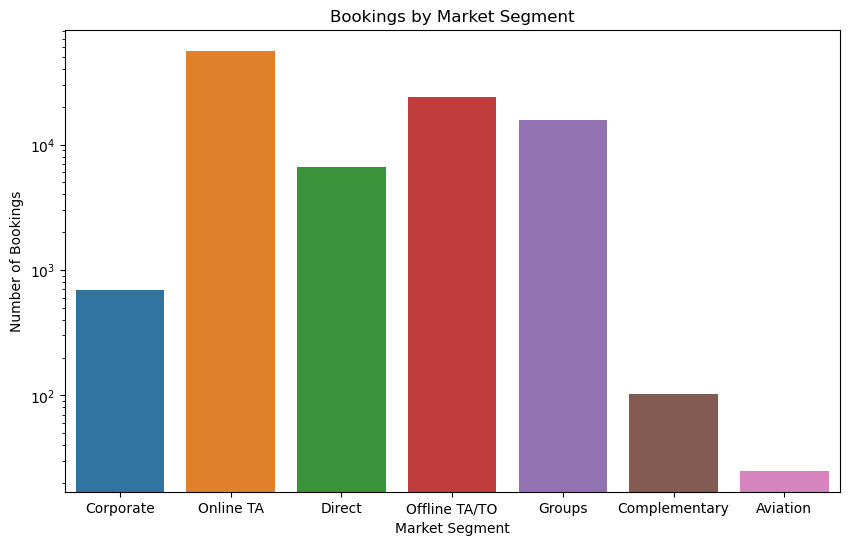

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='market_segment')
plt.title('Bookings by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.yscale('log')
plt.savefig('Bookings by Market Segment.png')
plt.savefig('Bookings by Market Segment.pdf')
plt.show()

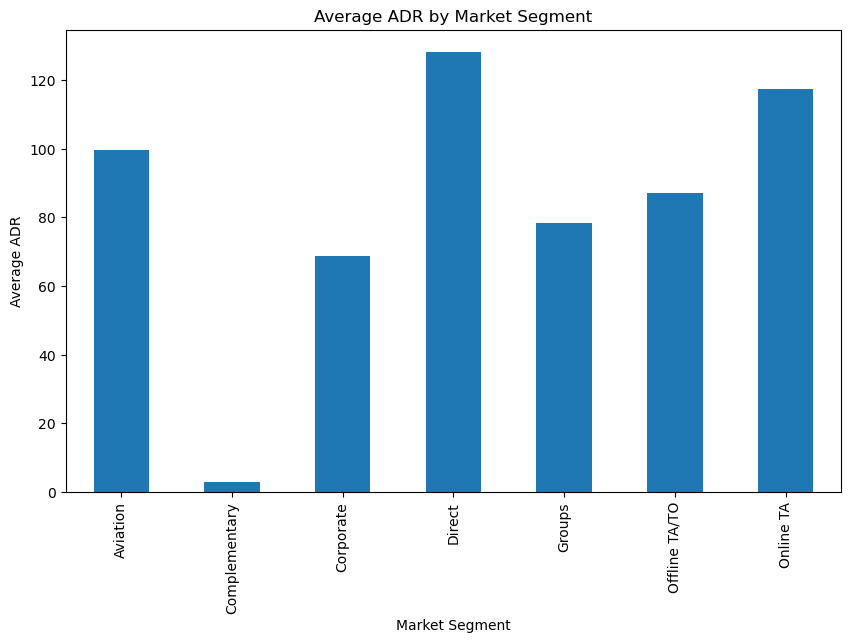

In [64]:
plt.figure(figsize=(10,6))
avg_adr_by_market_segment.plot(kind='bar')
plt.title('Average ADR by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average ADR')
plt.savefig('Average ADR by Market Segment.png')
plt.savefig('Average ADR by Market Segment.pdf')
plt.show()

In [65]:
# Calculate the total revenue for each booking (assuming ADR is per night and considering the number of nights)
data['revenue'] = data['adr'] * data['stay_duration']

# Group by market segment and calculate total revenue
revenue_by_market_segment = data.groupby('market_segment')['revenue'].sum().sort_values(ascending=False)

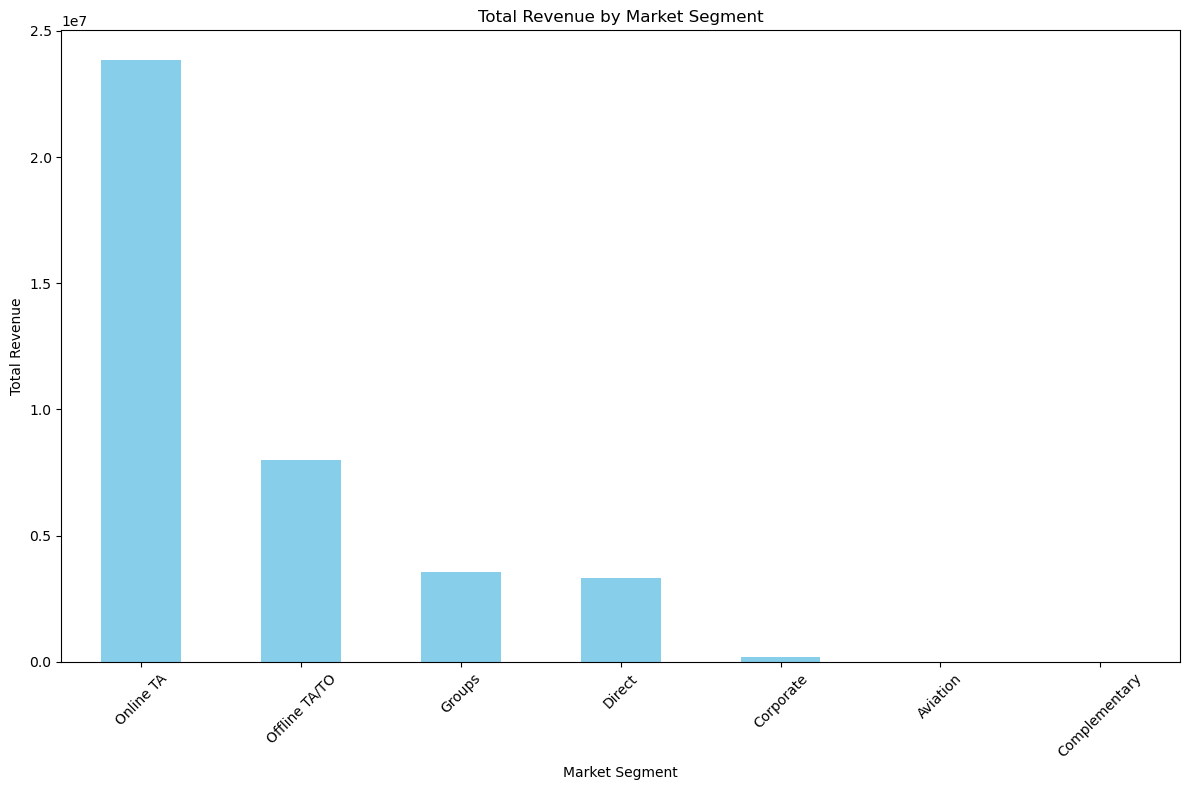

In [66]:
plt.figure(figsize=(12,8))
revenue_by_market_segment.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Total Revenue by Market Segment.png')
plt.savefig('Total Revenue by Market Segment.pdf')
plt.show()

In [146]:
data.head()

,index,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,stay_duration
3,3,Resort Hotel,0,13,27,0,1,1,0.0,0,...,304.0,0,Transient,75.0,0,0,Check-Out,02-07-15,2015-07-01,1
4,4,Resort Hotel,0,14,27,0,2,2,0.0,0,...,240.0,0,Transient,98.0,0,1,Check-Out,03-07-15,2015-07-01,2
5,5,Resort Hotel,0,14,27,0,2,2,0.0,0,...,240.0,0,Transient,98.0,0,1,Check-Out,03-07-15,2015-07-01,2
7,7,Resort Hotel,0,9,27,0,2,2,0.0,0,...,303.0,0,Transient,103.0,0,1,Check-Out,03-07-15,2015-07-01,2
8,8,Resort Hotel,1,85,27,0,3,2,0.0,0,...,240.0,0,Transient,82.0,0,1,Canceled,06-05-15,2015-07-01,3


In [145]:
# Reload the table with the column revenu

engine = create_engine('sqlite:///hotel_bookings.db')
data.to_sql('bookings', con=engine, index=False, if_exists='replace')
data.to_csv('transformed_data.csv', index=False)

# Creat a model 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# Select features and target variable
features = data[['hotel', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'market_segment']]
target = data['revenue']

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the preprocessing for numeric and categorical features
numeric_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']
categorical_features = ['hotel', 'meal', 'market_segment']

In [34]:
# Create a column transformer with standard scaling for numeric features and one-hot encoding for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [35]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['lead_time',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies']),
                                                 ('cat', OneHotEncoder(),
                                                  ['hotel', 'meal',
                                                   'market_segment'])])),
                ('regressor', LinearRegression())])

##  Evaluate the Model

In [36]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 122.44808879980563
Mean Squared Error: 42473.761111006286
R-squared: 0.6357467010417319


## Trying other model

In [37]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [38]:
# Define the model pipelines
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

gb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

In [39]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['lead_time',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies']),
                                                 ('cat', OneHotEncoder(),
                                                  ['hotel', 'meal',
                                                   'market_segment'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [40]:
# Make predictions on the test data with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f'Mean Absolute Error: {mae_rf}')
print(f'Mean Squared Error: {mse_rf}')
print(f'R-squared: {r2_rf}')

Random Forest Performance:
Mean Absolute Error: 86.49520742224367
Mean Squared Error: 29648.631697524765
R-squared: 0.7457345047169944


In [41]:
# Make predictions on the test data with Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Performance:")
print(f'Mean Absolute Error: {mae_gb}')
print(f'Mean Squared Error: {mse_gb}')
print(f'R-squared: {r2_gb}')


Gradient Boosting Performance:
Mean Absolute Error: 102.12847351144836
Mean Squared Error: 30215.285962320493
R-squared: 0.7408749001064875


The random forest regression has the best result. We are going to tune that model to get a better result.

## Feature Importance

In [42]:
# Extract feature importances from the Random Forest model
feature_importances = rf_model.named_steps['regressor'].feature_importances_

# Get feature names
feature_names = rf_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features).tolist() + numeric_features


In [43]:
# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

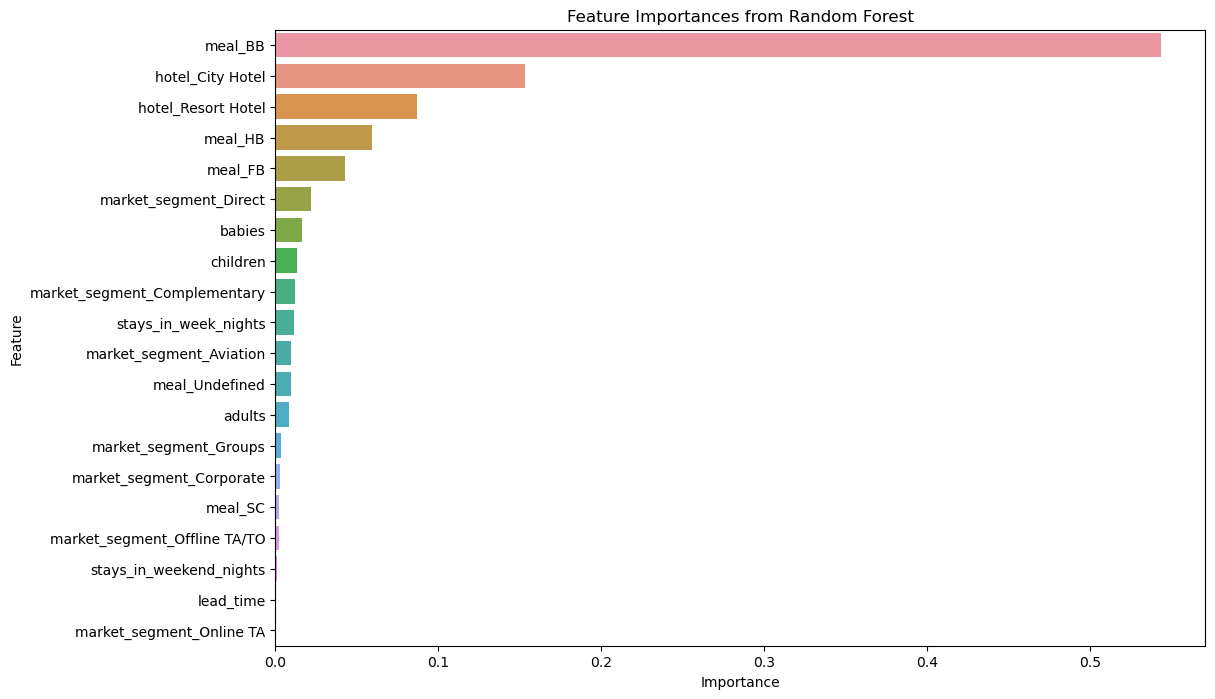

In [67]:
# Plot feature importances
plt.figure(figsize=(12,8))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importances from Random Forest')
plt.savefig('Feature Importances from Random Forest.png')
plt.savefig('Feature Importances from Random Forest.pdf')
plt.show()

## Example of prediction

In [54]:
# Define the new data point
new_data = pd.DataFrame({
    'hotel': ['Resort Hotel'],
    'lead_time': [30],
    'stays_in_weekend_nights': [2],
    'stays_in_week_nights': [3],
    'adults': [2],
    'children': [0],
    'babies': [0],
    'meal': ['FB'],
    'market_segment': ['Direct']
})

In [55]:
# Use the trained Random Forest model to make a prediction
predicted_revenue = rf_model.predict(new_data)

print(f'Predicted Revenue: {round(predicted_revenue[0],2)}')

Predicted Revenue: 533.22
